# Podstawy programowania (AD) 2

## Tomasz Rodak

Wykład IX

---

## Obiekty

Mówiliśmy już, że Python jest językiem obiektowym w tym sensie, że wszystkie przetwarzane w nim dane mają formę obiektów. Obiekty mogą być nazywane przez zmienne, mogą być argumentami funkcji i być przez funkcje zwracane. Cechą charakterystyczną obiektów jest to, że bardzo ciasno wiążą ze sobą dane i zachowania. Przykładowo, każda lista w oczywisty sposób zawiera jakieś dane. To, co jednak naprawdę decyduje o charakterze listy, to związane z listą zachowania. Pobranie elementu po indeksie, zmiana wartości, iteracja, dodawanie nowych wartości metodą `.append()`, obliczanie długości, itd., to są wszystko zachowania, które są z daną listą **związane**. Gdyby nie te zachowania, to nie byłoby różnicy między krotką a listą. Oczywiście, krotki i listy mają wiele wspólnych zachowań, przede wszystkim te, które czynią z obu tych struktur sekwencje, ale istnieją też między nimi istotne różnice właśnie w zachowaniach. Na przykład, jeśli krotka nie zawiera obiektów zmiennych, to można utworzyć jej skrót *hash*. Dzięki temu taka krotka może być kluczem w słowniku albo elementem zbioru. Nie jest to możliwe w przypadku list.

Co to znaczy, że obiekt ma związane ze sobą zachowania? Możesz myśleć o tym w ten sposób: obiekt bez zachowań to po prostu dane. Jeśli chcesz na tych danych pracować, to potrzebne do tego celu funkcje musisz uzyskać oddzielnie. Przykładem danych, które nie mają charakteru obiektu, jest plik na dysku. Taki plik, to po prostu ciąg bajtów, nie są związane z nim żadne zachowania. Dane i funkcje zdolne operować na tych danych są rozdzielone. W obiektach te dwie rzeczy są ściśle powiązane. Nie można dostarczyć do odbiorcy listy, która nie posiada metody `.append()` albo słownika, który nie ma metody `.get()`. Operacje przekazywane są wraz z danymi.

Wróćmy jeszcze na chwilę do plików, które jak powiedziałem, są surowymi danymi. Jak z plikami radzi sobie Python? Tworzy z nich obiekty! Do tego właśnie służy funkcja `open()`. Zwracana przez `open()` wartość jest obiektem. Dane w tym obiekcie to dane zawarte w pliku, poza tym jednak strumień posiada rozmaite metody pozwalające na operowanie na tych danych, jak na przykład metody `.read()` czy `.readline()` dla plików tekstowych. 

Zatem wszystkie dane przetwarzane w Pythonie są obiektami i dlatego Python jest językiem obiektowym. To jednak nie wszystko. Python jest językiem obiektowym również i dlatego, że pozwala programiście tworzyć **nowe kategorie obiektów**, a służą do tego celu **klasy**.

Klasa to szablon do produkcji obiektów. Kod klasy opisuje, w jaki sposób obiekt przechowuje dane i jakie mają wiązać się z obiektem zachowania, czyli metody. Klasa sama z siebie nic nie robi - jedyne co potrafi, to utworzyć nowy obiekt, zwany często *instancją* klasy, na podstawie zawartego w sobie kodu. Pokażemy teraz szczegóły składniowe klas w Pythonie na podstawie obiektowej implementacji żółwia znanego nam już z [ćwiczeń VI](http://math.uni.lodz.pl/~rodakt/dane/analiza_danych/PPwAD/lab_VI.html). W następnym wykładzie będziemy ten przykład rozbudowywać.

W tym wykładzie korzystamy z notatnika Jupyter. Dzięki temu możemy uruchamiać kod zawierający wizualizacje trasy żółwia. 

## Żółw

Oto prosta nieobiektowa implementacja żółwia z Logo:

In [1]:
from math import cos, sin, radians
from matplotlib import pyplot as plt
%matplotlib inline

def w_lewo(żółw, kąt):
    '''Obraca w lewo żółwia o kąt w stopniach.'''
    żółw['azymut'] += kąt

def w_prawo(żółw, kąt):
    '''Obraca w prawo żółwia o kąt w stopniach.'''
    żółw['azymut'] -= kąt

def naprzód(żółw, r):
    '''Przesuwa żółwia o r.'''
    x, y = żółw['X'][-1], żółw['Y'][-1]
    azymut = żółw['azymut']
    x += cos(radians(azymut))*r
    y += sin(radians(azymut))*r
    żółw['X'].append(x)
    żółw['Y'].append(y)

def ustaw_żółwia(x=0, y=0, azymut=0):
    '''Zwraca żółwia o zadanym położeniu startowym.'''
    return {'X': [x],
            'Y': [y],
            'azymut': azymut}

def rysuj(żółw, zachowaj_osie=True, **kwargs):
    '''Rysuje ścieżkę żółwia. Akceptuje argumenty funkcji plt.plot()
    dostosowujące rysunek.'''
    plt.plot(żółw['X'], żółw['Y'], **kwargs)

    if zachowaj_osie:
        ax = plt.gca()
        ax.set_aspect('equal')

Żółw reprezentowany jest przez dane opisujące jego stan i historię. Nowego żółwia tworzy funkcja `ustaw_żółwia()`:

In [2]:
tolek = ustaw_żółwia()

tolek

{'X': [0], 'Y': [0], 'azymut': 0}

Operacje na żółwiu wykonują zdefiniowane wyżej funkcje:

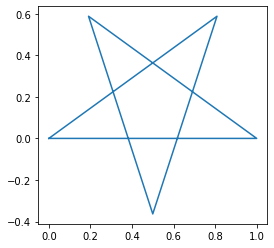

In [3]:
# Pentagram

for _ in range(5):
    naprzód(tolek, 1)
    w_lewo(tolek, 144)

rysuj(tolek)

## Klasy

Z punktu widzenia składni, klasy tworzy się podobnie jak funkcje. Za definicję funkcji odpowiada instrukcja złożona `def`, za definicję klasy - instrukcja złożona `class`. Oto najprostsza możliwa klasa:

In [4]:
class Żółw:
    pass

Po nazwie klasy występuje dwukropek, tak jak w każdej instrukcji złożonej. Kod klasy ciągnie się tak daleko, jak daleko niepuste linie mają wcięcie w stosunku do słowa `class`. Zdefiniowana wyżej klasa `Żółw` jest najprostszą z możliwych, gdyż jest to klasa pusta. Obiekty utworzone przez klasę `Żółw`, czyli jej instancje, nie zawierają żadnych metod, mogą jednak zawierać atrybuty wskazujące na dane i funkcje.

Klasa tworzy obiekt, gdy zostanie do niej zastosowany operator wywołania, czyli nawiasy okrągłe:

In [5]:
tolek = Żółw()
franklin = Żółw()

In [6]:
tolek

In [7]:
franklin

In [8]:
tolek is franklin

False

Jak widzimy, nowe obiekty tworzone przez klasę mają różne tożsamości. 

Żółwie `tolek` i `franklin` nic nie potrafią, gdyż zostały utworzone przez pustą klasę. Skoro jednak już istnieją, to można im przypisywać atrybuty:

In [9]:
tolek.X = [0]
tolek.Y = [0]
tolek.azymut = 0

In [10]:
tolek.X

[0]

Wykorzystanie atrybutów powoduje, że obiekt przypomina nieco słownik, tyle że w słowniku kluczem może być dowolny obiekt posiadający funkcję skrótu, podczas gdy atrybut jest zwykłą zmienną. Moglibyśmy teraz zmodyfikować funkcje `naprzód()`, `w_lewo()`, `w_prawo()` tak, aby operowały w odpowiedni sposób na obiektach klasy `Żółw` zamiast na słownikach. Byłaby to mała zmiana w stosunku do już istniejącego kodu. W szczególności funkcje te nadal nie byłyby związane z danymi tak jak to jest w obiektach.

Zamiast tego, do klasy `Żółw` dopiszemy metody:

In [11]:
from math import cos, sin, radians
from matplotlib import pyplot as plt
%matplotlib inline

class Żółw:
    
    def ustaw_żółwia(self, x=0, y=0, azymut=0):
        '''Ustawia żółwia w zadanym położeniu startowym.'''
        self.X = [x]
        self.Y = [y]
        self.azymut = azymut    

    def w_lewo(self, kąt):
        '''Obraca w lewo żółwia o kąt w stopniach.'''
        self.azymut += kąt

    def w_prawo(self, kąt):
        '''Obraca w prawo żółwia o kąt w stopniach.'''
        self.azymut -= kąt

    def naprzód(self, r):
        '''Przesuwa żółwia o r.'''
        x, y = self.X[-1], self.Y[-1]
        azymut = self.azymut
        x += cos(radians(azymut))*r
        y += sin(radians(azymut))*r
        self.X.append(x)
        self.Y.append(y)

    def rysuj(self, zachowaj_osie=True, **kwargs):
        '''Rysuje ścieżkę żółwia. Akceptuje argumenty funkcji plt.plot()
        dostosowujące rysunek.'''
        plt.plot(self.X, self.Y, **kwargs)
        
        if zachowaj_osie:
            ax = plt.gca()
            ax.set_aspect('equal')

W tym momencie powinieneś się na chwilę zatrzymać i dokładnie porównać ten kod z wcześniejszym. Gdzie pojawiły się zmiany?

Widzimy, że wszystkie funkcje weszły w skład kodu klasy. Funkcje zdefiniowane w klasie nazywamy **metodami**. Każda metoda, podobnie jak stałe zdefiniowane w klasie, jest atrybutem tej klasy, czyli mamy dostęp do tych elementów za pomocą notacji "z kropką":

In [12]:
class A:
    
    STAŁA = 'Ala ma kota'
    
    def f(x):
        return x**2

In [13]:
A.STAŁA

'Ala ma kota'

In [14]:
A.f

<function __main__.A.f(x)>

In [15]:
A.f(12)

144

Funkcja zdefiniowana w klasie jest po prostu zwykłą funkcją, tyle że występującą jako atrybut klasy. Popatrzmy teraz, jak wyglądają instancje klasy zawierającej definicje metod:

In [16]:
a = A()

a

In [17]:
a.STAŁA

'Ala ma kota'

In [18]:
a.f

<bound method A.f of <__main__.A object at 0x7fa8e1fae438>>

Stała i funkcja są atrybutami instancji, ale funkcja opisywana jest jako *bound method* instancji a nie *function*. Co więcej, próba wywołania tej funkcji kończy się niepowodzeniem:
```python
>>> a.f(12)
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-13-45a266ba2f04> in <module>
----> 1 a.f(12)

TypeError: f() takes 1 positional argument but 2 were given
```
Zwróć uwagę na komunikat -- Python twierdzi, że podaliśmy dwa argumenty!

Po utworzeniu instancji metoda klasy staje się **metodą związaną** z instancją. Cóż to oznacza? Po pierwsze, z poziomu instancji istnieje dostęp do funkcji za pomoca "notacji z kropką". Po drugie, gdy metoda związana z instancją jest wywoływana, to Python **automatycznie za pierwszy argument metody wstawia tę właśnie instancję**. Dlatego właśnie nie powiodło się wywołanie `a.f(12)`: za argument `x` interpreter wstawił instancję `a`, więc `12` jest traktowane jako drugi argument, podczas gdy funkcja `f()` ma tylko jeden parametr. 

Podsumujmy krótko te informacje:
* Pierwszym argumentem metody związanej z instancją jest ta instancja.
* Z tego powodu metody klas, poza pewnymi wyjątkami, posiadają zawsze co najmniej jeden parametr i co więcej, argument akceptowany przez pierwszy parametr metody będzie instancją.
* Nazwa tego pierwszego parametru jest dowolna, ale istnieje bardzo silna konwencja, aby nazywać go **`self`**.

Wróćmy teraz do klasy `Żółw`. Metody tej klasy wyglądają bardzo podobnie do funkcji zdefiniowanych wcześniej. Główna różnica polega na tym, że teraz pierwszym parametrem jest `self` a nie `żółw`. Wiemy już, że podczas wywołania metody związanej z instancją, ta właśnie instancja zostanie wstawiona za pierwszy parametr, czyli właśnie w miejsce `self`. 

Porównajmy kod funkcji `w_lewo()`:
```python
def w_lewo(żółw, kąt):
    '''Obraca w lewo żółwia o kąt w stopniach.'''
    żółw['azymut'] += kąt
```
z kodem metody `.w_lewo()`:
```python

class Żółw:

    <...>
    
    def w_lewo(self, kąt):
        '''Obraca w lewo żółwia o kąt w stopniach.'''
        self.azymut += kąt

    <...>
```
Funkcja modyfikuje obiekt globalny `żółw` (wiemy, że jest on słownikiem) aktualizując wartość w kluczu `'azymut'`. Metoda dokonuje takiej samej aktualizacji, ale nie wartości w kluczu, lecz atrybutu `self.azymut`. `self` jest pierwszym parametrem metody, więc podczas wywołania za `self` interpreter automatycznie wstawi instancję. Co to oznacza? Że metoda `.w_lewo()` aktualizuje atrybut tej instancji, która ją wywołuje, czyli "siebie"! Stąd bierze się nazwa `self`.

Sprawdźmy jak klasa `Żółw` działa w praktyce:

In [19]:
tolek = Żółw()

In [20]:
tolek

`tolek` na razie nie posiada atrybutów `.X`, `.Y`, `.azymut`. Wywołujemy metodę `.ustaw_żółwia()`, która te atrybuty utworzy:

In [21]:
tolek.ustaw_żółwia()

In [22]:
tolek.X, tolek.Y, tolek.azymut

([0], [0], 0)

Teraz możemy wprawić Tolka w ruch:

In [23]:
tolek.naprzód(1)

In [24]:
tolek.X, tolek.Y, tolek.azymut

([0, 1.0], [0, 0.0], 0)

In [25]:
tolek.w_lewo(90)

In [26]:
tolek.X, tolek.Y, tolek.azymut

([0, 1.0], [0, 0.0], 90)

In [27]:
tolek.naprzód(2)

In [28]:
tolek.X, tolek.Y, tolek.azymut

([0, 1.0, 1.0000000000000002], [0, 0.0, 2.0], 90)

In [29]:
tolek.w_prawo(45)

In [30]:
tolek.X, tolek.Y, tolek.azymut

([0, 1.0, 1.0000000000000002], [0, 0.0, 2.0], 45)

In [31]:
tolek.naprzód(3)

In [32]:
tolek.X, tolek.Y, tolek.azymut

([0, 1.0, 1.0000000000000002, 3.121320343559643],
 [0, 0.0, 2.0, 4.121320343559642],
 45)

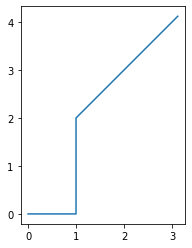

In [33]:
tolek.rysuj()

In [34]:
def spirala(żółw, bok, kąt, liczba_boków):
    for _ in range(liczba_boków):
        żółw.naprzód(bok)
        żółw.w_prawo(kąt)
        bok += 1

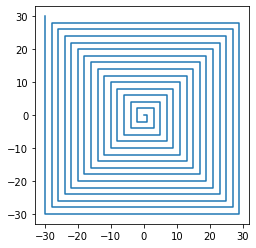

In [35]:
tolek = Żółw()
tolek.ustaw_żółwia()
spirala(tolek, 1, 90, 60)
tolek.rysuj()

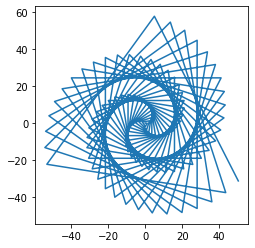

In [36]:
franklin = Żółw()
franklin.ustaw_żółwia()
spirala(franklin, 1, 117, 100)
franklin.rysuj()

## Metoda `.__init__()`

Gdy tworzymy nową instancję klasy `Żółw`:

In [37]:
tolek = Żółw()

to zawsze musimy wywołać na tej instancji metodę `.ustaw_żółwia()`, aby zdefiniować atrybuty przechowujące położenie. Jest to konieczne, gdyż każda z pozostałych metod zakłada, że atrybuty `.X`, `.Y`, `.azymut` już istnieją. Ponieważ bardzo często zachodzi potrzeba dodania atrybutów do instancji zaraz po jej utworzeniu, dlatego istnieje funkcjonalność, która rozwiązanie tego problemu automatyzuje, a jest nią metoda specjalna `.__init__()`.

Co to znaczy, że metoda jest specjalna? Jest to w istocie zwykła metoda, która sama z siebie nie różni się niczym od innych metod, z jednym wyjątkiem - metoda specjalna poza zwykłym wywołaniem bezpośrednim, może być również wywołana niejawnie przez jakąś specjalną składnię (i zwykle tak właśnie jest wywoływana). Znakiem szczególnym metody specjalnej są podkreślniki w jej nazwie: dwa z przodu, dwa z tyłu. Python ma wiele metod specjalnych i więcej powiemy o tym później, teraz zajmiemy się samą metodą `.__init__()`. 

Nazwa metody daje nam wskazówkę do czego ona służy - do *inicjalizacji* obiektu. Gdy klasa jest wywoływana powstaje nowy obiekt. Następnie interpreter sprawdza jakie argumenty zostały przekazane podczas wywołania klasy, szuka metody `.__init__()`, deleguje te argumenty do metody i ją wywołuje. Pierwszy argument `.__init__()` to nowo utworzona instancja, czyli `self`, pozostałe pochodzą z wywołania klasy. Metoda tworzy atrybuty, może przy tym korzystać z metod związanych, i kończy działanie. Nic nie zwraca.

W przypadku klasy `Żółw()` praca `.__init__()` była wykonywana przez `.ustaw_żółwia()`, przy czym użytkownik sam musiał pamiętać, aby tę metodę wywołać. Zamienimy ją teraz na `.__init__()`:

In [38]:
from math import cos, sin, radians
from matplotlib import pyplot as plt
%matplotlib inline

class Żółw:
    '''Żółw z języka LOGO.
    
    Atrybuty:
        x, y: położenie startowe,
        azymut: kąt do kierunku wschodniego.
    '''
    
    def __init__(self, x=0, y=0, azymut=0):
        self.X = [x]
        self.Y = [y]
        self.azymut = azymut    

    def w_lewo(self, kąt):
        '''Obraca w lewo żółwia o kąt w stopniach.'''
        self.azymut += kąt

    def w_prawo(self, kąt):
        '''Obraca w prawo żółwia o kąt w stopniach.'''
        self.azymut -= kąt

    def naprzód(self, r):
        '''Przesuwa żółwia o r.'''
        x, y = self.X[-1], self.Y[-1]
        azymut = self.azymut
        x += cos(radians(azymut))*r
        y += sin(radians(azymut))*r
        self.X.append(x)
        self.Y.append(y)

    def rysuj(self, zachowaj_osie=True, **kwargs):
        '''Rysuje ścieżkę żółwia. Akceptuje argumenty funkcji plt.plot()
        dostosowujące rysunek.'''
        plt.plot(self.X, self.Y, **kwargs)
        
        if zachowaj_osie:
            ax = plt.gca()
            ax.set_aspect('equal')

Dowód działania metody `.__init__()`:

In [39]:
tolek = Żółw()

In [40]:
tolek.X, tolek.Y, tolek.azymut

([0], [0], 0)

In [41]:
def spirala_zwijająca_się(żółw, bok, kąt, przyrost_kąta, liczba_boków):
    for _ in range(liczba_boków):
        żółw.naprzód(bok)
        żółw.w_prawo(kąt)
        kąt += przyrost_kąta

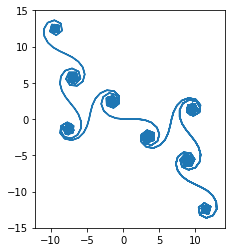

In [42]:
franklin = Żółw()
spirala_zwijająca_się(franklin, 1, 0, 7, 1000)
franklin.rysuj()

Tak jak przedtem do `.ustaw_żółwia()`, tak teraz do wywołania klasy możesz przekazać parametry:

In [43]:
def kwadrat(żółw, bok):
    for _ in [1, 2, 3, 4]:
        żółw.naprzód(bok)
        żółw.w_prawo(90)

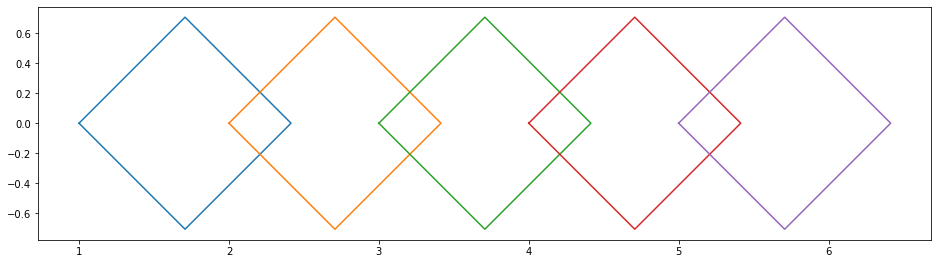

In [44]:
fig = plt.figure(figsize=(16, 5))

for x in [1, 2, 3, 4, 5]:
    tolek = Żółw(x=x, azymut=45)
    kwadrat(tolek, 1)
    tolek.rysuj()